In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import savemat # for saving data to .mat file
import sys

In [2]:
# path to functions
sys.path.append(r"/home/illich/SeriesDistance/SeriesDistance Python NEU/functions Python NEU/")

# import functions
from f_smooth_DP import f_smooth_DP
from f_ReplaceEqualNeighbours import f_ReplaceEqualNeighbours
from f_FindSplitPoints import f_FindSplitPoints
from f_PlotInput import f_plot_input
from f_CoarseGraining_SD_Continuous import f_coarse_graining_continuous
from f_PlotConnectedSeries import f_PlotConnectedSeries
from f_PlotSDErrors_OnePanel import f_PlotSDErrors_OnePanel

orginal obs: var: 69.171188618656, # extremes: 1988, diff(obs)=3408.547
orginal sim: var: 52.86143165392219, # extremes: 500, diff(sim)=2680.4173
smoothed obs: var: 69.03954912923022, # extremes: 246, diff(obs)=2957.607
smoothed sim: var: 52.86143165392219, # extremes: 500, diff(sim)=2680.4173


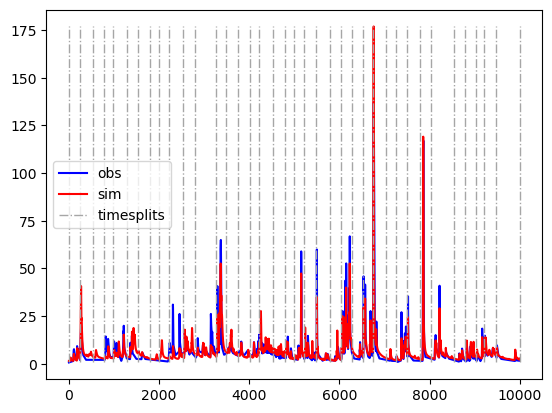

time series split 0 of 37
obs_split [0.643      0.65121649 0.65943299 0.66764948 0.67586598 0.68408247
 0.69229897 0.70051546 0.70873196 0.71694845 0.72516495 0.73338144
 0.74159794 0.74981443 0.75803093 0.76624742 0.77446392 0.78268041
 0.79089691 0.7991134  0.8073299  0.81554639 0.82376289 0.83197938
 0.84019588 0.84841237 0.85662887 0.86484536 0.87306186 0.88127835
 0.88949485 0.89771134 0.90592784 0.91414433 0.92236082 0.93057732
 0.93879381 0.94701031 0.9552268  0.9634433  0.97165979 0.97987629
 0.98809278 0.99630928 1.00452577 1.01274227 1.02095876 1.02917526
 1.03739175 1.04560825 1.05382474 1.06204124 1.07025773 1.07847423
 1.08669072 1.09490722 1.10312371 1.11134021 1.1195567  1.1277732
 1.13598969 1.14420619 1.15242268 1.16063918 1.16885567 1.17707216
 1.18528866 1.19350515 1.20172165 1.20993814 1.21815464 1.22637113
 1.23458763 1.24280412 1.25102062 1.25923711 1.26745361 1.2756701
 1.2838866  1.29210309 1.30031959 1.30853608 1.31675258 1.32496907
 1.33318557 1.34140206 1.349

Exception: FORCED STOP coarsegraining

In [3]:
#  ====================================================================== 
#                 Series Distance Analysis (Continuous Mode) 
#  ======================================================================
#  last modification 16.08.2016

# This development release of the SeriesDistance (SD) method is applicable to continuous 
# observed (obs) and simulated (sim) discharge time series. It outputs a 2d-error 
# distribution for the entire time series. Contrary to the event based method the 
# continuous version does not differentiate periods of low-flow from periods of events.  
# Nevertheless, the entire hydrograph is classified into rising and falling limbs. The 
# interpretation of these classes is however only meaningful if the periods of low-flow 
# do not cover a significant portion of the hydrograph. Note: For plotting,
# the error distributions for rise and fall are combined.

# Further information:
# Seibert, S. P., Ehret, U., and Zehe, E., 2016: Disentangling timing and amplitude errors in streamflow simulations, Hydrol. Earth Syst. Sci.
# Ehret, U., Zehe, E., 2011. Series distance - An intuitive metric to quantify hydrograph similarity in terms of occurrence, amplitude and timing of hydrological events. Hydrol. Earth Syst. Sci. 15, 877–896. doi:10.5194/hess-15-877-2011

# Dependencies
# All required functions are stored in folder \functions

# Input (ascii format)
#  - obs: [n,1] matrix with equidistant and NaN-free time series of observed discharge data.
#  - sim: [n,1] matrix with equidistant and NaN-free time series of simulated discharge data. 
#  - timeseries_splits: [n,1] optional matrix with points in time where the 'obs' and 'sim' time series will be split to increase computational speed.
#     It must include the first and the last timestep of 'obs' and 'sim'. E.g. if 'obs' and 'sim' are [1100,1],
#     then 'timeseries_splits' could be (1, 250, 800, 1100)

# Parameters are explained and specified in the parameter block

# Outputs (all stored within a single binary file .mat)
#  - obs:              observed discharge (smoothed)
#  - sim:              simulated discharge
#  - segs_obs_opt_all: optimized segments in obs
#  - segs_sim_opt_all: optimized segments in sim
#  - connectors:       SD connectors
#  - e_sd_q_all:       SD magnitude errors for entire time series
#  - e_sd_t_all:       SD timing errors for entire time series
#  - parameters:       all parameters, i.e. error_model, objective function weights, smoothing parameters,  
#                       are included in the outputfile

# Start from scratch
os.system('clear')  # for Linux and macOS
# os.system('cls')  # for Windows
plt.close('all')  # close all figures

# specify paths and parameters, read inputs
# os.chdir('ADD_YOUR_PATH_HERE')  # set working directory

########################################################### mein Working Directory ###########################################################
os.chdir(r"/home/illich/SeriesDistance/")
########################################################### mein Working Directory ###########################################################

# read input
# obs = np.genfromtxt('data/HOST_timeseries.csv', delimiter=';', skip_header=1, usecols=2, max_rows=10000)
# sim = np.genfromtxt('data/HOST_timeseries.csv', delimiter=';', skip_header=1, usecols=3, max_rows=10000)

obs = np.genfromtxt('data/HOST_timeseries.csv', delimiter=';', skip_header=1, usecols=2, max_rows=10000)
sim = np.genfromtxt('data/HOST_timeseries.csv', delimiter=';', skip_header=1, usecols=3, max_rows=10000)

# # print some information
# print('Input data SD_Analysis_Continuous:')
# # print("obs: ", obs)
# print('type obs: ', type(obs))
# print('dtype obs: ', obs.dtype)
# print('shape obs: ', obs.shape)
# print('\n')
# # print("sim: ", sim)
# print('type sim: ', type(sim))
# print('dtype sim: ', sim.dtype)
# print('shape sim: ', sim.shape)
# print('\n')

# output filenames
outfile = './results/output_Continuous.mat'

# smoothing options
smooth_flag = True         # smooth both obs and sim (default=True)
nse_smooth_limit = 0.99    # specifies degree of smoothing according to NSE criterion (default=0.99)

# specification of the magnitude error model
error_model = 'relative'  # 'relative' or 'standard'; (default='relative')

# options for time series splitting:
timeseries_split_by_user = False  # 'true': time series splits provided by user in ascii file. 'false': splits will be placed by the program (default=False)
split_frequency = 250             # only required if timeseries_split_by_user=False: this is the default distance between 2 splits (default=500)

# parametrization of the objective function 
weight_nfc = 1/7   # weights number of re-assigned hydrological cases (default= 1)    
weight_rds = 1/7   # weights the importance of the re-assigned segments (default=1) 
weight_sdt = 5/7   # weights the SD timing error component (default=5)
weight_sdv = 0     # weights the SD magnitude error component (default=0)

# set plot flags 
pf_input = True                   # plots input time series ('obs' and 'sim')
pf_segs_cons_entireTS = True      # plots obs, sim, colour-coded pairs of matching segments, SeriesDistance connectors for the entire time series
pf_errordist = True               # plots SeriesDistance error distributions 

# Data manipulations and pre-processing

# smooth if required (default=True)
if smooth_flag:
    obs_org = obs.copy()
    sim_org = sim.copy()
    obs, sim = f_smooth_DP(obs, sim, nse_smooth_limit)

# # print some information
# print('\n')
# print('Data after smoothening:')
# # print("obs: ", obs)
# print('type obs: ', type(obs))
# print('dtype obs: ', obs.dtype)
# print('shape obs: ', obs.shape)
# print('\n')
# # print("sim: ", sim)
# print('type sim: ', type(sim))
# print('dtype sim: ', sim.dtype)
# print('shape sim: ', sim.shape)
# print('\n')

# replace identical neighbouring values to avoid problems with assignment of unique peaks and valleys
obs_ReplaceEqualNeighbours = f_ReplaceEqualNeighbours(obs)

obs = f_ReplaceEqualNeighbours(obs)
sim = f_ReplaceEqualNeighbours(sim)

# # print some information
# print('Data after f_replace_equal_neighbours:')
# # print("obs: ", obs)
# print('type obs: ', type(obs))
# print('dtype obs: ', obs.dtype)
# print('shape obs: ', obs.shape)
# print('\n')
# # print("sim: ", sim)
# print('type sim: ', type(sim))
# print('dtype sim: ', sim.dtype)
# print('shape sim: ', sim.shape)
# print('\n')

# Define time series split points to improve coarse-graining performance
if not timeseries_split_by_user:
    timeseries_splits = f_FindSplitPoints(obs, sim, split_frequency)  # find split points if they are not provided by the user       
else:
    timeseries_splits = np.genfromtxt('data/HOST_ts_splits.csv', delimiter=';')  # read splits defined by user.

# print('timeseries_splits: ', timeseries_splits)
# print('\n')

# plot input data
if pf_input:
    f_plot_input([], obs, [], [], sim, [], [], timeseries_splits)  # show time series splits

# cleanup
del smooth_flag, nse_smooth_limit, pf_input, timeseries_split_by_user, split_frequency

# Apply coarse-graining and the SD method to the entire time series 
# note: contrary to the event based method both, the coarse-graining and the SD calculation 
# take place in the same function here due to the splitting of the time series. To this end 
# the splitting is solved in a simplistic way and does not support separating the 
# coarse-graining and SD calculation as in the event-based version.

# apply coarse graining and SD calculation: determines optimal level of segment aggregation for entire time series and applies SD to it
segs_obs_opt_all, segs_sim_opt_all, connectors, e_sd_t_all, e_sd_q_all = f_coarse_graining_continuous(
    obs, sim, timeseries_splits, weight_nfc, weight_rds, weight_sdt, weight_sdv, error_model)
raise Exception('STOP erzwungen')

# plot time series with optimized segments and connectors in an own figure

# print('Input f_PlotConnectedSeries:')
# print('segs_obs_opt_all: ', segs_obs_opt_all)
# print('segs_obs_opt_all type: ', type(segs_obs_opt_all))
# print('segs_obs_opt_all dtype: ', type(segs_obs_opt_all[0]))
# print('\n')
# print('segs_sim_opt_all: ', segs_sim_opt_all)
# print('segs_sim_opt_all type: ', type(segs_sim_opt_all))
# print('segs_sim_opt_all dtype: ', type(segs_sim_opt_all[0]))
# print('\n')
# print('connectors: ', connectors)
# print('connectors type: ', type(connectors))
# print('connectors dtype: ', type(connectors[0]))
# print('\n')

if pf_segs_cons_entireTS:
    f_PlotConnectedSeries(obs, segs_obs_opt_all, sim, segs_sim_opt_all, connectors)

# code hinzugefügt zu Übersetzung
e_sd_q_all_new = []
for list in e_sd_q_all:
    for element in list:
        e_sd_q_all_new.append(element)

e_sd_t_all_new = []
for list in e_sd_t_all:
    for element in list:
        e_sd_t_all_new.append(element)
        
# plot 2d-error distributions
if pf_errordist:
    f_PlotSDErrors_OnePanel(e_sd_t_all_new, e_sd_q_all_new)
    # f_PlotSDErrors_OnePanel(e_sd_t_all, e_sd_q_all)

# save output
savemat(outfile, {
    'obs': obs,
    'sim': sim,
    'segs_obs_opt_all': segs_obs_opt_all,
    'segs_sim_opt_all': segs_sim_opt_all,
    'connectors': connectors,
    'e_sd_t_all': e_sd_t_all,
    'e_sd_q_all': e_sd_q_all,
    'weight_nfc': weight_nfc,
    'weight_rds': weight_rds,
    'weight_sdt': weight_sdt,
    'weight_sdv': weight_sdv,
    'error_model': error_model
})

In [6]:
# segs_obs_opt_all
# segs_sim_opt_all
# connectors
# e_sd_t_all
# e_sd_q_all

[{'starttime_global': np.int64(-1),
  'starttime_local': 0,
  'endtime_global': np.int64(194),
  'endtime_local': 195,
  'length': 195,
  'rel_length': 0.8125,
  'sum_dQ': np.float64(6.712),
  'rel_dQ': np.float64(0.8063687887030538),
  'relevance': np.float64(1.4326002081473457)},
 {'starttime_global': np.int64(111),
  'starttime_local': 112,
  'endtime_global': np.int64(239),
  'endtime_local': 240,
  'length': 128,
  'rel_length': 0.5333333333333333,
  'sum_dQ': np.float64(-5.048163265306127),
  'rel_dQ': np.float64(0.7611271387377163),
  'relevance': np.float64(1.0024236834701554)},
 {'starttime_global': np.int64(175),
  'starttime_local': 176,
  'endtime_global': np.int64(194),
  'endtime_local': 195,
  'length': 19,
  'rel_length': 0.07916666666666666,
  'sum_dQ': np.float64(5.215),
  'rel_dQ': np.float64(0.3869910331555445),
  'relevance': np.float64(0.5957847345518119)},
 {'starttime_global': np.int64(180),
  'starttime_local': 181,
  'endtime_global': np.int64(239),
  'endtime

In [4]:
print('type of output')
print('type of obs: ', type(obs))
print('type of sim: ', type(sim))
print('type of segs_obs_opt_all: ', type(segs_obs_opt_all))
print('type of segs_sim_opt_all: ', type(segs_sim_opt_all))
print('type of connectors: ', type(connectors))
print('type of e_sd_t_all: ', type(e_sd_t_all))
print('type of e_sd_q_all: ', type(e_sd_q_all))
print('type of weight_nfc: ', type(weight_nfc))
print('type of weight_rds: ', type(weight_rds))
print('type of weight_sdt: ', type(weight_sdt))
print('type of weight_sdv: ', type(weight_sdv))
print('type of error_model: ', type(error_model))
print('\n')

type of output
type of obs:  <class 'numpy.ndarray'>
type of sim:  <class 'numpy.ndarray'>
type of segs_obs_opt_all:  <class 'list'>
type of segs_sim_opt_all:  <class 'list'>
type of connectors:  <class 'list'>
type of e_sd_t_all:  <class 'list'>
type of e_sd_q_all:  <class 'list'>
type of weight_nfc:  <class 'float'>
type of weight_rds:  <class 'float'>
type of weight_sdt:  <class 'float'>
type of weight_sdv:  <class 'int'>
type of error_model:  <class 'str'>


